Assignment: Flowers Recognition <br>
Dataset Description:<br>

This dataset contains 4242 images of flowers.<br>
The data collection is based on the data flicr, google images, yandex images.<br>
You can use this datastet to recognize plants from the photo.<br>

Attribute Information:<br>
The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.<br>
For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels. <br>
<b>Also explore how to resize images in tensorflow and then resize all the images to a same size. </b> <br>
This is a Multiclass Classification Problem.<br>




WORKFLOW : <br>
Load Data <br>
Split into 60 and 40 ratio.<br>
Encode labels.<br>
Create Model<br>
Compilation Step (Note : Its a Multiclass Classification problem , select loss , metrics according to it)<br>
Train the Model.<br>
If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .<br>
Prediction should be > 85%<br>
Evaluation Step<br>
Prediction<br>




Data : <br>
https://drive.google.com/file/d/1-OX6wn5gA-bJpjPNfSyaYQLz-A-AB_uj/view?usp=sharing

In [28]:
import numpy as np
import pandas as pd 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os
from pathlib import Path

In [29]:
from keras.preprocessing import image
p = Path('flowers')
dirs = p.glob('*')
image_data = []
labels = []
label_dict = {'dandelion':0,'daisy':1,'sunflower':2,'tulip':3,'rose':4}
for folder_dir in dirs:
    label= str(folder_dir).split('\\')[-1]
    cnt = 0
    print(label)
    for image_path in folder_dir.glob('*.jpg'):
        img = image.load_img(image_path,target_size = (100,100))
        img_array = image.img_to_array(img)
        image_data.append(img_array)
        #print('img_array',img_array)
        labels.append(label_dict[label])

daisy
dandelion
rose
sunflower
tulip


In [30]:
print(len(image_data),len(labels))

4323 4323


In [31]:
labels[4000]

3

In [32]:
x = np.array(image_data)
y = np.array(labels)

In [33]:
average_pixel_values = np.mean(x, axis=3, keepdims=True)

In [34]:
average_pixel_values.shape

(4323, 100, 100, 1)

In [35]:
greyImage = np.concatenate([average_pixel_values]*3, axis=3)

In [36]:
greyImage.shape

(4323, 100, 100, 3)

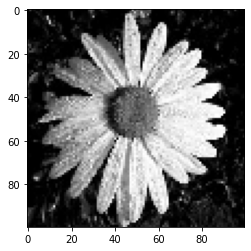

In [37]:
import matplotlib.pyplot as plt
greyImage = greyImage.astype(int)

#show the final image
plt.imshow(greyImage[50])

In [38]:
grayscale_image = greyImage

In [39]:
#rgb_weights = [0.2989, 0.5870, 0.1140]
##Rec. 601 Color Transform
#gx=x
#grayscale_image = np.dot(gx[...,:3], rgb_weights)

In [40]:
grayscale_image.shape

(4323, 100, 100, 3)

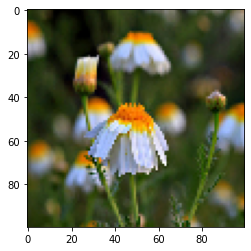

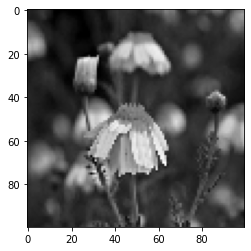

1

In [41]:
import matplotlib.pyplot as plt
plt.imshow(x[500]/255.0)
plt.show()
plt.imshow(grayscale_image[500])
plt.show()
y[2]

## Shuffle and then Split into 60 and 40 ratio

In [42]:
#Shuffle
idx = np.random.permutation(len(labels))
#print(idx, len(idx))
x = np.array(image_data)
y = np.array(labels)
x,y = grayscale_image[idx], y[idx]

In [43]:
#All_images = grayscale_image.reshape((len(xtrain), 100 * 100 * 3))
#All_images = All_images.astype('float32') / 255.0

#from sklearn.model_selection import train_test_split
#xtrain, xtest, ytrain,ytest = train_test_split(All_images,y,test_size=0.40,random_state=55)

In [44]:
#Spliting
print('60% = ',len(labels) *0.60)
xtrain = x[:2594]
ytrain = y[:2594]
xtest = x[2594:]
ytest = y[2594:]

60% =  2593.7999999999997


In [45]:
print('Training Data Shape',xtrain.shape)
print('Testing Data Shape',xtest.shape)

Training Data Shape (2594, 100, 100, 3)
Testing Data Shape (1729, 100, 100, 3)


In [46]:
training_images = xtrain.astype('float32')/255.0
test_images = xtest.astype('float32')/255.0

train_labels = ytrain
test_labels = ytest


In [101]:
print(train_labels.shape)

(2594,)


In [47]:
print('Categories : ',np.unique(y) )

Categories :  [0 1 2 3 4]


In [48]:
#grayscale_image[0]

In [49]:
#print(All_images.shape)
#print(100*100)

In [50]:
#from keras import models
#from keras import layers
#model = models.Sequential()
#model.add(layers.Dense(8000, activation='relu', input_shape=(100 * 100 * 3,)))
#model.add(layers.Flatten())
#model.add(layers.Dense(8000, activation='relu'))
#model.add(layers.Dense(2000, activation='relu'))
#model.add(layers.Dense(512, activation='relu'))
#model.add(layers.Dense(128, activation='relu'))
#model.add(layers.Dense(32, activation='relu'))
#model.add(layers.Dense(6, activation='softmax'))


model =  tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                     tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                     tf.keras.layers.Dense(5, activation=tf.nn.softmax)
                                    ])


In [51]:
#from keras.utils import to_categorical
#train_labels = to_categorical(ytrain)
#test_labels = to_categorical(ytest)

In [52]:
train_labels.shape

(2594,)

In [53]:
train_labels

array([3, 3, 3, ..., 0, 2, 4])

In [54]:
model.compile(optimizer='rmsprop',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [55]:
history = model.fit(training_images, train_labels, epochs=500, batch_size=128)

Epoch 1/500
21/21 [==============================] - 13s 512ms/step - loss: 80.8018 - accuracy: 0.2103
Epoch 2/500
21/21 [==============================] - 9s 417ms/step - loss: 16.2238 - accuracy: 0.2180
Epoch 3/500
21/21 [==============================] - 9s 414ms/step - loss: 12.3556 - accuracy: 0.2699
Epoch 4/500
21/21 [==============================] - 9s 419ms/step - loss: 13.9880 - accuracy: 0.2676
Epoch 5/500
21/21 [==============================] - 9s 417ms/step - loss: 10.2867 - accuracy: 0.2601
Epoch 6/500
21/21 [==============================] - 9s 421ms/step - loss: 9.5947 - accuracy: 0.2581
Epoch 7/500
21/21 [==============================] - 9s 413ms/step - loss: 8.4072 - accuracy: 0.2654
Epoch 8/500
21/21 [==============================] - 9s 424ms/step - loss: 8.0796 - accuracy: 0.2685
Epoch 9/500
21/21 [==============================] - 9s 411ms/step - loss: 7.5864 - accuracy: 0.2583
Epoch 10/500
21/21 [==============================] - 8s 401ms/step - loss: 4.9940 - 

21/21 [==============================] - 10s 465ms/step - loss: 1.0645 - accuracy: 0.5722
Epoch 82/500
21/21 [==============================] - 10s 463ms/step - loss: 1.1392 - accuracy: 0.5606
Epoch 83/500
21/21 [==============================] - 10s 451ms/step - loss: 0.9928 - accuracy: 0.6136
Epoch 84/500
21/21 [==============================] - 10s 451ms/step - loss: 1.0877 - accuracy: 0.5687
Epoch 85/500
21/21 [==============================] - 9s 419ms/step - loss: 0.9418 - accuracy: 0.6440
Epoch 86/500
21/21 [==============================] - 8s 405ms/step - loss: 0.9536 - accuracy: 0.6299
Epoch 87/500
21/21 [==============================] - 9s 400ms/step - loss: 0.9437 - accuracy: 0.6213
Epoch 88/500
21/21 [==============================] - 9s 408ms/step - loss: 0.8952 - accuracy: 0.6777
Epoch 89/500
21/21 [==============================] - 9s 417ms/step - loss: 1.0319 - accuracy: 0.6246
Epoch 90/500
21/21 [==============================] - 9s 420ms/step - loss: 1.0053 - accura

21/21 [==============================] - 6s 304ms/step - loss: 0.5190 - accuracy: 0.8287
Epoch 161/500
21/21 [==============================] - 6s 302ms/step - loss: 0.6974 - accuracy: 0.7576
Epoch 162/500
21/21 [==============================] - 6s 296ms/step - loss: 0.6081 - accuracy: 0.7915
Epoch 163/500
21/21 [==============================] - 6s 289ms/step - loss: 0.4237 - accuracy: 0.8578
Epoch 164/500
21/21 [==============================] - 6s 305ms/step - loss: 1.1771 - accuracy: 0.7195
Epoch 165/500
21/21 [==============================] - 6s 299ms/step - loss: 0.9055 - accuracy: 0.7144
Epoch 166/500
21/21 [==============================] - 6s 299ms/step - loss: 0.7976 - accuracy: 0.7669
Epoch 167/500
21/21 [==============================] - 6s 291ms/step - loss: 0.6718 - accuracy: 0.7813
Epoch 168/500
21/21 [==============================] - 6s 291ms/step - loss: 0.6489 - accuracy: 0.7774
Epoch 169/500
21/21 [==============================] - 6s 291ms/step - loss: 0.4712 - a

21/21 [==============================] - 7s 312ms/step - loss: 0.4594 - accuracy: 0.8645
Epoch 240/500
21/21 [==============================] - 6s 298ms/step - loss: 0.3333 - accuracy: 0.9129
Epoch 241/500
21/21 [==============================] - 7s 317ms/step - loss: 0.4027 - accuracy: 0.8896
Epoch 242/500
21/21 [==============================] - 6s 305ms/step - loss: 0.2910 - accuracy: 0.9054
Epoch 243/500
21/21 [==============================] - 6s 295ms/step - loss: 0.5854 - accuracy: 0.8252
Epoch 244/500
21/21 [==============================] - 7s 310ms/step - loss: 0.5051 - accuracy: 0.8572
Epoch 245/500
21/21 [==============================] - 7s 316ms/step - loss: 0.2084 - accuracy: 0.9302
Epoch 246/500
21/21 [==============================] - 7s 331ms/step - loss: 0.6531 - accuracy: 0.8222
Epoch 247/500
21/21 [==============================] - 7s 358ms/step - loss: 0.4223 - accuracy: 0.8774
Epoch 248/500
21/21 [==============================] - 7s 343ms/step - loss: 0.2977 - a

21/21 [==============================] - 7s 327ms/step - loss: 0.4272 - accuracy: 0.8935
Epoch 319/500
21/21 [==============================] - 7s 329ms/step - loss: 0.1215 - accuracy: 0.9648
Epoch 320/500
21/21 [==============================] - 7s 320ms/step - loss: 0.2530 - accuracy: 0.9181
Epoch 321/500
21/21 [==============================] - 7s 321ms/step - loss: 0.3346 - accuracy: 0.9094
Epoch 322/500
21/21 [==============================] - 7s 320ms/step - loss: 0.6455 - accuracy: 0.8486
Epoch 323/500
21/21 [==============================] - 7s 327ms/step - loss: 0.2419 - accuracy: 0.9260
Epoch 324/500
21/21 [==============================] - 7s 343ms/step - loss: 0.7441 - accuracy: 0.8354
Epoch 325/500
21/21 [==============================] - 7s 331ms/step - loss: 0.3411 - accuracy: 0.8901
Epoch 326/500
21/21 [==============================] - 7s 323ms/step - loss: 0.3849 - accuracy: 0.8968
Epoch 327/500
21/21 [==============================] - 7s 328ms/step - loss: 0.1635 - a

21/21 [==============================] - 6s 285ms/step - loss: 1.3801 - accuracy: 0.8013
Epoch 398/500
21/21 [==============================] - 6s 293ms/step - loss: 0.1095 - accuracy: 0.9676
Epoch 399/500
21/21 [==============================] - 6s 284ms/step - loss: 0.7339 - accuracy: 0.8733
Epoch 400/500
21/21 [==============================] - 6s 299ms/step - loss: 0.2668 - accuracy: 0.9450
Epoch 401/500
21/21 [==============================] - 6s 287ms/step - loss: 0.0681 - accuracy: 0.9837
Epoch 402/500
21/21 [==============================] - 6s 282ms/step - loss: 0.1864 - accuracy: 0.9485
Epoch 403/500
21/21 [==============================] - 6s 289ms/step - loss: 1.1366 - accuracy: 0.8244
Epoch 404/500
21/21 [==============================] - 6s 282ms/step - loss: 0.2379 - accuracy: 0.9329
Epoch 405/500
21/21 [==============================] - 6s 289ms/step - loss: 0.1328 - accuracy: 0.9714
Epoch 406/500
21/21 [==============================] - 6s 292ms/step - loss: 1.2427 - a

21/21 [==============================] - 6s 295ms/step - loss: 0.3332 - accuracy: 0.9424
Epoch 477/500
21/21 [==============================] - 6s 285ms/step - loss: 0.0254 - accuracy: 0.9920
Epoch 478/500
21/21 [==============================] - 6s 284ms/step - loss: 0.4556 - accuracy: 0.8860
Epoch 479/500
21/21 [==============================] - 6s 286ms/step - loss: 0.1236 - accuracy: 0.9661
Epoch 480/500
21/21 [==============================] - 6s 291ms/step - loss: 0.2583 - accuracy: 0.9259
Epoch 481/500
21/21 [==============================] - 6s 287ms/step - loss: 1.4627 - accuracy: 0.8307
Epoch 482/500
21/21 [==============================] - 6s 286ms/step - loss: 0.0314 - accuracy: 0.9919
Epoch 483/500
21/21 [==============================] - 6s 286ms/step - loss: 0.3624 - accuracy: 0.9134
Epoch 484/500
21/21 [==============================] - 6s 284ms/step - loss: 0.5444 - accuracy: 0.9343
Epoch 485/500
21/21 [==============================] - 6s 284ms/step - loss: 0.0380 - a

In [56]:
test_case = model.predict(test_images)

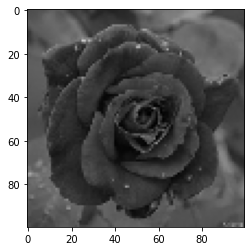

dict_keys(['dandelion', 'daisy', 'sunflower', 'tulip', 'rose'])


In [109]:
plt.imshow(test_images[0])
plt.show()
print(label_dict.keys())

In [80]:
y_test_pred = np.argmax(test_case,axis = 1)

In [96]:
print(y_test_pred[369])
print(test_labels[369])

1
1


In [110]:
matchedcount=0
for i in range(len(y_test_pred)):
    print('i = ',i, '---',y_test_pred[i],'------',test_labels[i])
    if(y_test_pred[i] == test_labels[i]):
        matchedcount=matchedcount+1
print("Total matched : ",matchedcount,"from ",len(y_test_pred))

i =  0 --- 1 ------ 4
i =  1 --- 4 ------ 1
i =  2 --- 0 ------ 3
i =  3 --- 0 ------ 0
i =  4 --- 1 ------ 0
i =  5 --- 1 ------ 2
i =  6 --- 0 ------ 0
i =  7 --- 1 ------ 4
i =  8 --- 1 ------ 1
i =  9 --- 1 ------ 1
i =  10 --- 4 ------ 4
i =  11 --- 4 ------ 3
i =  12 --- 1 ------ 2
i =  13 --- 1 ------ 2
i =  14 --- 1 ------ 4
i =  15 --- 1 ------ 1
i =  16 --- 1 ------ 0
i =  17 --- 1 ------ 3
i =  18 --- 3 ------ 3
i =  19 --- 1 ------ 4
i =  20 --- 3 ------ 1
i =  21 --- 2 ------ 2
i =  22 --- 1 ------ 3
i =  23 --- 1 ------ 1
i =  24 --- 4 ------ 1
i =  25 --- 1 ------ 0
i =  26 --- 1 ------ 0
i =  27 --- 1 ------ 1
i =  28 --- 1 ------ 4
i =  29 --- 0 ------ 3
i =  30 --- 1 ------ 3
i =  31 --- 4 ------ 0
i =  32 --- 3 ------ 2
i =  33 --- 1 ------ 1
i =  34 --- 1 ------ 0
i =  35 --- 2 ------ 4
i =  36 --- 2 ------ 0
i =  37 --- 1 ------ 1
i =  38 --- 0 ------ 1
i =  39 --- 1 ------ 1
i =  40 --- 1 ------ 0
i =  41 --- 0 ------ 0
i =  42 --- 1 ------ 3
i =  43 --- 1 ------ 

i =  381 --- 1 ------ 2
i =  382 --- 1 ------ 4
i =  383 --- 1 ------ 4
i =  384 --- 3 ------ 1
i =  385 --- 1 ------ 3
i =  386 --- 4 ------ 0
i =  387 --- 2 ------ 2
i =  388 --- 1 ------ 1
i =  389 --- 1 ------ 3
i =  390 --- 1 ------ 4
i =  391 --- 3 ------ 3
i =  392 --- 1 ------ 4
i =  393 --- 1 ------ 2
i =  394 --- 1 ------ 1
i =  395 --- 4 ------ 0
i =  396 --- 1 ------ 4
i =  397 --- 2 ------ 3
i =  398 --- 3 ------ 3
i =  399 --- 0 ------ 3
i =  400 --- 1 ------ 1
i =  401 --- 2 ------ 4
i =  402 --- 1 ------ 1
i =  403 --- 0 ------ 2
i =  404 --- 1 ------ 0
i =  405 --- 1 ------ 2
i =  406 --- 1 ------ 2
i =  407 --- 1 ------ 0
i =  408 --- 0 ------ 3
i =  409 --- 2 ------ 2
i =  410 --- 4 ------ 4
i =  411 --- 1 ------ 4
i =  412 --- 1 ------ 1
i =  413 --- 1 ------ 4
i =  414 --- 1 ------ 3
i =  415 --- 1 ------ 4
i =  416 --- 0 ------ 0
i =  417 --- 4 ------ 3
i =  418 --- 1 ------ 4
i =  419 --- 1 ------ 1
i =  420 --- 1 ------ 2
i =  421 --- 1 ------ 1
i =  422 --- 1 -

i =  757 --- 1 ------ 3
i =  758 --- 3 ------ 3
i =  759 --- 1 ------ 4
i =  760 --- 1 ------ 2
i =  761 --- 0 ------ 2
i =  762 --- 1 ------ 1
i =  763 --- 0 ------ 4
i =  764 --- 1 ------ 3
i =  765 --- 1 ------ 0
i =  766 --- 2 ------ 4
i =  767 --- 1 ------ 3
i =  768 --- 1 ------ 0
i =  769 --- 2 ------ 2
i =  770 --- 1 ------ 2
i =  771 --- 0 ------ 4
i =  772 --- 1 ------ 0
i =  773 --- 1 ------ 0
i =  774 --- 1 ------ 4
i =  775 --- 1 ------ 1
i =  776 --- 1 ------ 2
i =  777 --- 1 ------ 3
i =  778 --- 1 ------ 3
i =  779 --- 1 ------ 3
i =  780 --- 1 ------ 3
i =  781 --- 2 ------ 3
i =  782 --- 0 ------ 0
i =  783 --- 3 ------ 2
i =  784 --- 4 ------ 4
i =  785 --- 1 ------ 3
i =  786 --- 3 ------ 1
i =  787 --- 0 ------ 4
i =  788 --- 2 ------ 4
i =  789 --- 3 ------ 2
i =  790 --- 0 ------ 4
i =  791 --- 4 ------ 0
i =  792 --- 1 ------ 1
i =  793 --- 1 ------ 1
i =  794 --- 2 ------ 2
i =  795 --- 1 ------ 1
i =  796 --- 1 ------ 3
i =  797 --- 4 ------ 4
i =  798 --- 1 -

i =  1122 --- 1 ------ 2
i =  1123 --- 3 ------ 4
i =  1124 --- 1 ------ 4
i =  1125 --- 1 ------ 0
i =  1126 --- 1 ------ 1
i =  1127 --- 1 ------ 1
i =  1128 --- 1 ------ 1
i =  1129 --- 1 ------ 0
i =  1130 --- 1 ------ 2
i =  1131 --- 3 ------ 4
i =  1132 --- 1 ------ 3
i =  1133 --- 1 ------ 0
i =  1134 --- 1 ------ 3
i =  1135 --- 1 ------ 1
i =  1136 --- 3 ------ 4
i =  1137 --- 1 ------ 3
i =  1138 --- 1 ------ 3
i =  1139 --- 1 ------ 0
i =  1140 --- 1 ------ 0
i =  1141 --- 1 ------ 1
i =  1142 --- 1 ------ 2
i =  1143 --- 1 ------ 1
i =  1144 --- 1 ------ 0
i =  1145 --- 0 ------ 2
i =  1146 --- 4 ------ 3
i =  1147 --- 1 ------ 3
i =  1148 --- 4 ------ 1
i =  1149 --- 3 ------ 3
i =  1150 --- 1 ------ 2
i =  1151 --- 1 ------ 2
i =  1152 --- 1 ------ 0
i =  1153 --- 3 ------ 3
i =  1154 --- 1 ------ 1
i =  1155 --- 4 ------ 1
i =  1156 --- 1 ------ 2
i =  1157 --- 3 ------ 3
i =  1158 --- 1 ------ 0
i =  1159 --- 1 ------ 1
i =  1160 --- 1 ------ 3
i =  1161 --- 1 ------ 0


i =  1480 --- 1 ------ 2
i =  1481 --- 1 ------ 0
i =  1482 --- 1 ------ 4
i =  1483 --- 3 ------ 3
i =  1484 --- 1 ------ 0
i =  1485 --- 1 ------ 0
i =  1486 --- 1 ------ 3
i =  1487 --- 1 ------ 3
i =  1488 --- 1 ------ 3
i =  1489 --- 3 ------ 3
i =  1490 --- 0 ------ 0
i =  1491 --- 1 ------ 1
i =  1492 --- 0 ------ 4
i =  1493 --- 1 ------ 1
i =  1494 --- 1 ------ 3
i =  1495 --- 1 ------ 4
i =  1496 --- 1 ------ 0
i =  1497 --- 3 ------ 1
i =  1498 --- 1 ------ 0
i =  1499 --- 1 ------ 4
i =  1500 --- 3 ------ 0
i =  1501 --- 2 ------ 4
i =  1502 --- 3 ------ 2
i =  1503 --- 1 ------ 2
i =  1504 --- 1 ------ 0
i =  1505 --- 1 ------ 4
i =  1506 --- 0 ------ 4
i =  1507 --- 1 ------ 0
i =  1508 --- 0 ------ 1
i =  1509 --- 1 ------ 4
i =  1510 --- 0 ------ 0
i =  1511 --- 2 ------ 2
i =  1512 --- 2 ------ 3
i =  1513 --- 1 ------ 3
i =  1514 --- 1 ------ 3
i =  1515 --- 0 ------ 1
i =  1516 --- 1 ------ 3
i =  1517 --- 1 ------ 2
i =  1518 --- 1 ------ 2
i =  1519 --- 0 ------ 0


In [ ]:
### Trying with split Validation data

In [ ]:
#x_val = xtrain[:1000]
#partial_x_train = xtrain[1000:]
#y_val = train_labels[:1000]
#partial_y_train = train_labels[1000:]

In [ ]:
#history = model.fit(partial_x_train,
#partial_y_train,
#epochs=20,
#batch_size=512,
#validation_data=(x_val, y_val))

In [ ]:
#history.history.keys()

In [ ]:
#import matplotlib.pyplot as plt
#loss = history.history['loss']
#val_loss = history.history['val_loss']
#epochs = range(1, len(loss) + 1)
#plt.plot(epochs, loss, 'bo', label='Training loss')
#plt.plot(epochs, val_loss, 'b', label='Validation loss')
#plt.title('Training and validation loss')
#plt.xlabel('Epochs')
#plt.ylabel('Loss')
#plt.legend()
#plt.show()

In [ ]:
#plt.clf()
#acc = history.history['accuracy']
#val_acc = history.history['val_accuracy']
#plt.plot(epochs, acc, 'bo', label='Training acc')
#plt.plot(epochs, val_acc, 'b', label='Validation acc')
#plt.title('Training and validation accuracy')
#plt.xlabel('Epochs')
#plt.ylabel('Loss')
#plt.legend()
#plt.show()

In [ ]:
#test_case = model.predict(xtest)
#test_case

In [ ]:
#y_test_pred = np.argmax(test_case,axis = 1)
#y_test_pred

In [ ]:
#for i in range(5):
#    print("actual",ytest[i],"predicted",y_test_pred[i])